In [1]:
import pandas as pd
from pandas import Series, DataFrame
import json 
import os
import requests 
import math
import sqlite3
import copy
import re
import seaborn as sns
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
matplotlib.rcParams.update({'font.size': 15})

In [2]:
          
wpdata=pd.read_csv("workplacedata.csv")
wpdata=wpdata.set_index(wpdata["OBJECTID"])
wpdata.head()

,Bicycle,Bus,Carpool2,Carpool3,Carpool4,Carpool5,Carpool7,DES_ID,DES_ID_1,DES_LENGTH,...,Rail,ShapeSTLength,Subway,Taxi,Total,Trolley,WORKPLACE,Walked,WorkedHome,coordinates
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,14888.338340,...,0.0,14888.338340,0.0,0.0,10.0,0.0,"Census Tract 10, Dane County, Wisconsin",0.0,0.0,"[[-89.47539185715189, 43.08293455103483], [-89..."
2,0.0,25.0,0.0,0.0,0.0,0.0,0.0,101.0,101.0,7271.941348,...,0.0,7271.941348,0.0,0.0,35.0,0.0,"Census Tract 101, Dane County, Wisconsin",0.0,0.0,"[[-89.47539185715189, 43.08293455103483], [-89..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,102.0,30090.845436,...,NaN,30090.845436,NaN,NaN,NaN,NaN,"Census Tract 102, Dane County, Wisconsin",NaN,NaN,"[[-89.47539185715189, 43.08293455103483], [-89..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,103.0,37615.520001,...,NaN,37615.520001,NaN,NaN,NaN,NaN,"Census Tract 103, Dane County, Wisconsin",NaN,NaN,"[[-89.47539185715189, 43.08293455103483], [-89..."
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,104.0,39009.663787,...,NaN,39009.663787,NaN,NaN,NaN,NaN,"Census Tract 104, Dane County, Wisconsin",NaN,NaN,"[[-89.47539185715189, 43.08293455103483], [-89..."


In [3]:
        
rbusdata=pd.read_csv("busrapidtransitstops.csv")
rbusdata=rbusdata.set_index(rbusdata["OBJECTID"])
rbusdata["Notes"] = rbusdata['Notes'].fillna("")
rbusdata["MetroID"] = rbusdata['MetroID'].fillna(0)
rbusdata.head()

,MetroID,Notes,OBJECTID,Type,coordinates,stop_id,stop_lat,stop_lon,stop_name
OBJECTID,,,,,,,,,
1,581.0,Relo back from ns Charter,1,NaN,"[-89.4067258292439, 43.072085410950756]",91002.0,43.072085,-89.406726,EB W JOHNSON fs ORCHARD
2,0.0,,2,NaN,"[-89.39889106559133, 43.07198547024096]",91003.0,43.071985,-89.398891,EB W JOHNSON fs E CAMPUS MALL
3,883.0,,3,NaN,"[-89.3882599703234, 43.07470505644012]",91005.0,43.074705,-89.388260,EB STATE ns FAIRCHILD
4,1101.0,,4,NaN,"[-89.38385397193187, 43.0733250570924]",91006.0,43.073325,-89.383854,EB MAIN fs CARROLL
5,1323.0,,5,NaN,"[-89.38155697266535, 43.07637905618432]",91007.0,43.076379,-89.381557,EB EAST WASH fs WEBSTER


In [4]:
#data clean up 
dic = []
for coor in wpdata["coordinates"]:
    coor = str(coor)
    coor = coor.replace("[", "")
    coor = coor.replace("]", "")
    coor = coor.replace(",", "")
    #coor = coor.replace("-", "")
    coor = coor.split()
    dic.append(coor)
wpdata["coordinates"] = dic
dic = []
for coor in rbusdata["coordinates"]:
    coor = str(coor)
    coor = coor.replace("[", "")
    coor = coor.replace("]", "")
    coor = coor.replace(",", "")
    #coor = coor.replace("-", "")
    coor = coor.split()
    dic.append(coor)
rbusdata["coordinates"] = dic
wpdata.head()

,Bicycle,Bus,Carpool2,Carpool3,Carpool4,Carpool5,Carpool7,DES_ID,DES_ID_1,DES_LENGTH,...,Rail,ShapeSTLength,Subway,Taxi,Total,Trolley,WORKPLACE,Walked,WorkedHome,coordinates
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,14888.338340,...,0.0,14888.338340,0.0,0.0,10.0,0.0,"Census Tract 10, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.43..."
2,0.0,25.0,0.0,0.0,0.0,0.0,0.0,101.0,101.0,7271.941348,...,0.0,7271.941348,0.0,0.0,35.0,0.0,"Census Tract 101, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.44..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,102.0,30090.845436,...,NaN,30090.845436,NaN,NaN,NaN,NaN,"Census Tract 102, Dane County, Wisconsin",NaN,NaN,"[-89.47539185715189, 43.08293455103483, -89.37..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,103.0,37615.520001,...,NaN,37615.520001,NaN,NaN,NaN,NaN,"Census Tract 103, Dane County, Wisconsin",NaN,NaN,"[-89.47539185715189, 43.08293455103483, -89.33..."
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,104.0,39009.663787,...,NaN,39009.663787,NaN,NaN,NaN,NaN,"Census Tract 104, Dane County, Wisconsin",NaN,NaN,"[-89.47539185715189, 43.08293455103483, -89.33..."


In [5]:
#cleaning up NaN in origional wpdata
wpdata.fillna(0, inplace=True)
wpdata.head()

,Bicycle,Bus,Carpool2,Carpool3,Carpool4,Carpool5,Carpool7,DES_ID,DES_ID_1,DES_LENGTH,...,Rail,ShapeSTLength,Subway,Taxi,Total,Trolley,WORKPLACE,Walked,WorkedHome,coordinates
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,14888.338340,...,0.0,14888.338340,0.0,0.0,10.0,0.0,"Census Tract 10, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.43..."
2,0.0,25.0,0.0,0.0,0.0,0.0,0.0,101.0,101.0,7271.941348,...,0.0,7271.941348,0.0,0.0,35.0,0.0,"Census Tract 101, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.44..."
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,102.0,30090.845436,...,0.0,30090.845436,0.0,0.0,0.0,0.0,"Census Tract 102, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.37..."
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,103.0,37615.520001,...,0.0,37615.520001,0.0,0.0,0.0,0.0,"Census Tract 103, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.33..."
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,104.0,39009.663787,...,0.0,39009.663787,0.0,0.0,0.0,0.0,"Census Tract 104, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.33..."


In [6]:
#choosing locations that are within the madison map from the wpdata regardless of what the distance is from the bus stops
# approximate radius of earth in km
#ref https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
from math import sin, cos, sqrt, atan2, radians
dic= []
R = 6373.0
#for _, row in df.iterrows():
 #coordinates = row["coordinates"] 
    
for index in wpdata["OBJECTID"]:
    coordinates = wpdata[wpdata["OBJECTID"] == index]
    coordinates = coordinates["coordinates"]
    for coor in coordinates:                    
        lat1 = float(coor[1])
        lon1 = float(coor[0])
        lat2 = float(coor[3])
        lon2 = float(coor[2])
        if 42.975 < lat1 < 43.2:
            if -89.6 <lon1 < -89.20:
                if 42.975 < lat2 < 43.2:
                    if -89.6 < lon2 < -89.20:
                        dic.append(wpdata[wpdata["OBJECTID"]==index])
                       
madisondata=pd.concat(dic)
print(len(madisondata["OBJECTID"]))
madisondata.head()      

6642


,Bicycle,Bus,Carpool2,Carpool3,Carpool4,Carpool5,Carpool7,DES_ID,DES_ID_1,DES_LENGTH,...,Rail,ShapeSTLength,Subway,Taxi,Total,Trolley,WORKPLACE,Walked,WorkedHome,coordinates
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,14888.338340,...,0.0,14888.338340,0.0,0.0,10.0,0.0,"Census Tract 10, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.43..."
2,0.0,25.0,0.0,0.0,0.0,0.0,0.0,101.0,101.0,7271.941348,...,0.0,7271.941348,0.0,0.0,35.0,0.0,"Census Tract 101, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.44..."
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,102.0,30090.845436,...,0.0,30090.845436,0.0,0.0,0.0,0.0,"Census Tract 102, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.37..."
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,103.0,37615.520001,...,0.0,37615.520001,0.0,0.0,0.0,0.0,"Census Tract 103, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.33..."
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,104.0,39009.663787,...,0.0,39009.663787,0.0,0.0,0.0,0.0,"Census Tract 104, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.33..."


In [7]:
#choosing wpdata to only 4 mile close to bus stops
from math import sin, cos, sqrt, atan2, radians
dic= []
R = 6373.0
for index in madisondata["OBJECTID"]:
    coordinates = madisondata[madisondata["OBJECTID"] == index]
    coordinates = coordinates["coordinates"]
    for bcoor in rbusdata["coordinates"]:
        for coor in coordinates:                    
            lat1 = radians(float(coor[1]))
            lon1 = radians(float(coor[0]))
            lat2 = radians(float(bcoor[1]))
            lon2 = radians(float(bcoor[0]))
            dlon = lon2 - lon1
            dlat = lat2 - lat1
            a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))
            distance = R * c
            if distance <= 4:
                dic.append(madisondata[madisondata["OBJECTID"]==index])
closewpdata=pd.concat(dic) 
closewpdata=closewpdata.drop_duplicates(subset=["OBJECTID"], keep="first")
print(len(closewpdata))

5265


In [8]:
dic=[]
for index in closewpdata["OBJECTID"]:
    coordinates = closewpdata[closewpdata["OBJECTID"] == index]
    coordinates = coordinates["coordinates"]
    for bcoorr in rbusdata["coordinates"]:
        lat1 = radians(float(coor[3]))
        lon1 = radians(float(coor[2]))
        lat2 = radians(float(bcoorr[1]))
        lon2 = radians(float(bcoorr[0]))
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = R * c
        if distance <= 4:
            dic.append(closewpdata[closewpdata["OBJECTID"]==index])
closewpdata=pd.concat(dic)  
closed = copy.deepcopy(closewpdata)
closed=closed.drop_duplicates(subset=["OBJECTID"], keep="first")
closed

,Bicycle,Bus,Carpool2,Carpool3,Carpool4,Carpool5,Carpool7,DES_ID,DES_ID_1,DES_LENGTH,...,Rail,ShapeSTLength,Subway,Taxi,Total,Trolley,WORKPLACE,Walked,WorkedHome,coordinates
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.00,10.00,14888.338340,...,0.0,14888.338340,0.0,0.0,10.0,0.0,"Census Tract 10, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.43..."
2,0.0,25.0,0.0,0.0,0.0,0.0,0.0,101.00,101.00,7271.941348,...,0.0,7271.941348,0.0,0.0,35.0,0.0,"Census Tract 101, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.44..."
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.00,102.00,30090.845436,...,0.0,30090.845436,0.0,0.0,0.0,0.0,"Census Tract 102, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.37..."
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.00,103.00,37615.520001,...,0.0,37615.520001,0.0,0.0,0.0,0.0,"Census Tract 103, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.33..."
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104.00,104.00,39009.663787,...,0.0,39009.663787,0.0,0.0,0.0,0.0,"Census Tract 104, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.33..."
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.01,105.01,51567.503958,...,0.0,51567.503958,0.0,0.0,0.0,0.0,"Census Tract 105.01, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.29..."
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.02,105.02,61023.656158,...,0.0,61023.656158,0.0,0.0,0.0,0.0,"Census Tract 105.02, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.27..."
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.00,106.00,56599.141943,...,0.0,56599.141943,0.0,0.0,0.0,0.0,"Census Tract 106, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.31..."
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.01,107.01,32425.511744,...,0.0,32425.511744,0.0,0.0,0.0,0.0,"Census Tract 107.01, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.44..."


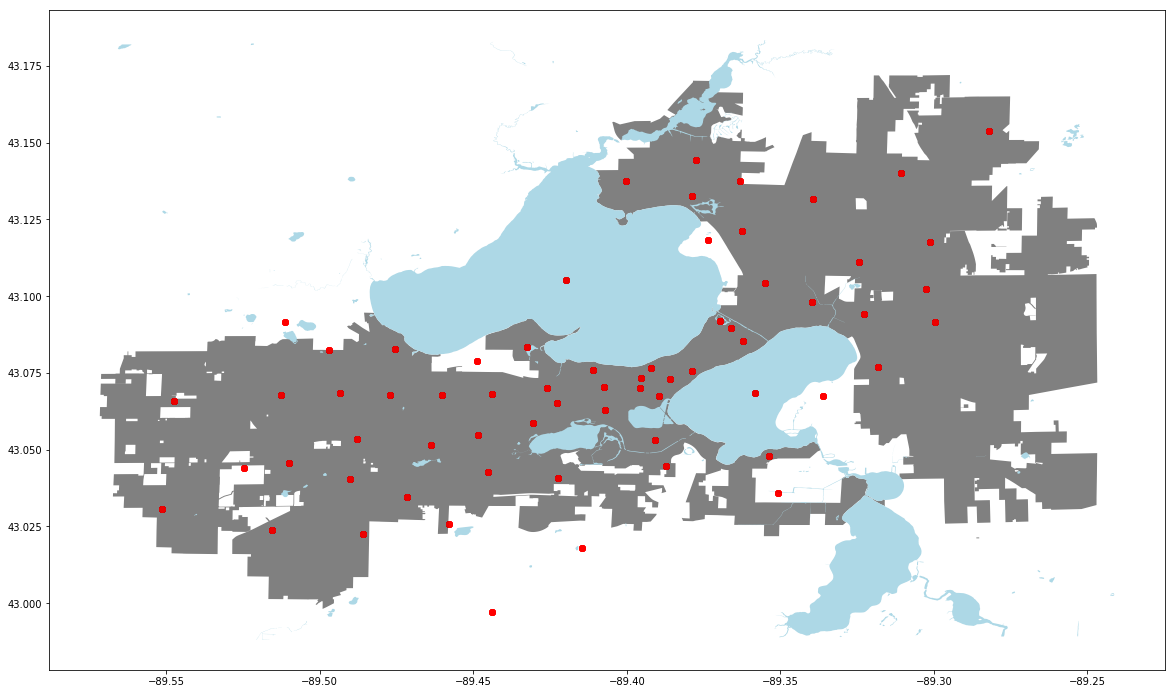

In [11]:
import pandas as pd
import geopandas # we'll use this to read shapefiles
from shapely.geometry import Point
madison = geopandas.read_file("City_Limit")
lakes = geopandas.read_file("Lakes_and_Rivers")
homedic = []
for coor in closed["coordinates"]:
    homedic.append(Point(float(coor[0]),float(coor[1])))
hcoords = pd.Series(homedic)
hs = pd.DataFrame({"Coordinates": hcoords})
hs = geopandas.GeoDataFrame(hs, geometry='Coordinates')

ax = madison.plot(color="gray", figsize=(20,20))
lakes.plot(color="lightblue", ax=ax)
hs.plot(color="red", ax=ax, alpha=0.05)

In [12]:
pd.DataFrame(closed).to_csv("fourmile.csv", encoding='utf-8', index=False)   

In [13]:
fourmile=pd.read_csv("fourmile.csv")
fourmile

,Bicycle,Bus,Carpool2,Carpool3,Carpool4,Carpool5,Carpool7,DES_ID,DES_ID_1,DES_LENGTH,...,Rail,ShapeSTLength,Subway,Taxi,Total,Trolley,WORKPLACE,Walked,WorkedHome,coordinates
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.00,10.00,14888.338340,...,0.0,14888.338340,0.0,0.0,10.0,0.0,"Census Tract 10, Dane County, Wisconsin",0.0,0.0,"['-89.47539185715189', '43.08293455103483', '-..."
1,0.0,25.0,0.0,0.0,0.0,0.0,0.0,101.00,101.00,7271.941348,...,0.0,7271.941348,0.0,0.0,35.0,0.0,"Census Tract 101, Dane County, Wisconsin",0.0,0.0,"['-89.47539185715189', '43.08293455103483', '-..."
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.00,102.00,30090.845436,...,0.0,30090.845436,0.0,0.0,0.0,0.0,"Census Tract 102, Dane County, Wisconsin",0.0,0.0,"['-89.47539185715189', '43.08293455103483', '-..."
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.00,103.00,37615.520001,...,0.0,37615.520001,0.0,0.0,0.0,0.0,"Census Tract 103, Dane County, Wisconsin",0.0,0.0,"['-89.47539185715189', '43.08293455103483', '-..."
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104.00,104.00,39009.663787,...,0.0,39009.663787,0.0,0.0,0.0,0.0,"Census Tract 104, Dane County, Wisconsin",0.0,0.0,"['-89.47539185715189', '43.08293455103483', '-..."
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.01,105.01,51567.503958,...,0.0,51567.503958,0.0,0.0,0.0,0.0,"Census Tract 105.01, Dane County, Wisconsin",0.0,0.0,"['-89.47539185715189', '43.08293455103483', '-..."
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.02,105.02,61023.656158,...,0.0,61023.656158,0.0,0.0,0.0,0.0,"Census Tract 105.02, Dane County, Wisconsin",0.0,0.0,"['-89.47539185715189', '43.08293455103483', '-..."
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.00,106.00,56599.141943,...,0.0,56599.141943,0.0,0.0,0.0,0.0,"Census Tract 106, Dane County, Wisconsin",0.0,0.0,"['-89.47539185715189', '43.08293455103483', '-..."
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.01,107.01,32425.511744,...,0.0,32425.511744,0.0,0.0,0.0,0.0,"Census Tract 107.01, Dane County, Wisconsin",0.0,0.0,"['-89.47539185715189', '43.08293455103483', '-..."
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.02,107.02,41538.323186,...,0.0,41538.323186,0.0,0.0,0.0,0.0,"Census Tract 107.02, Dane County, Wisconsin",0.0,0.0,"['-89.47539185715189', '43.08293455103483', '-..."
